<center><h1>Predict Customer Personality to Boost Marketing Campaign</h1></center>

Nama : Ali Imran Nasution<br>

## Konteks

<p align='justify'> Sebuah perusahaan dapat berkembang dengan pesat saat mengetahui perilaku customer personality nya, sehingga dapat memberikan layanan serta manfaat lebih baik kepada customers yang berpotensi menjadi loyal customers. Dengan mengolah data historical marketing campaign guna menaikkan performa dan menyasar customers yang tepat agar dapat bertransaksi di platform perusahaan, dari insight data tersebut fokus kita adalah membuat sebuah model prediksi kluster sehingga memudahkan perusahaan dalam membuat keputusan.</p>

## Import Relevant Packages

In [ ]:
# data wrangling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#warning filter
import warnings
warnings.filterwarnings("ignore")

#outlier handling
from scipy import stats

#standarisasi
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, MinMaxScaler

#modelling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline

## Load Dataset

In [ ]:
try:
  df = pd.read_csv('marketing_campaign_data.csv', index_col=0)
except:
  !gdown 1ivQOBXZQrTNQOuBlsYm5sLA8BiOmud_a
  df = pd.read_csv('marketing_campaign_data.csv', index_col=0)

Downloading...
From: https://drive.google.com/uc?id=1ivQOBXZQrTNQOuBlsYm5sLA8BiOmud_a
To: /content/marketing_campaign_data.csv
100% 264k/264k [00:00<00:00, 65.6MB/s]


In [ ]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
377,4459,1989,S1,Lajang,30279000.0,1,0,30-12-2012,13,10000,...,8,0,0,0,0,0,0,3,11,0
1661,1404,1968,S1,Bertunangan,34916000.0,2,0,15-05-2013,89,51000,...,9,0,0,0,0,0,0,3,11,0
1065,4415,1961,S1,Menikah,16860000.0,1,1,12-09-2012,19,10000,...,7,0,0,0,0,0,0,3,11,0
244,6439,1958,S1,Menikah,61074000.0,0,1,17-08-2012,37,789000,...,7,0,0,0,0,0,0,3,11,0
2034,983,1984,S1,Menikah,40059000.0,1,0,28-09-2013,82,110000,...,8,1,0,0,0,0,0,3,11,0


####  Deskripsi



Deskripsi kolom diambil dari [Link](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign) ini.
- ID: Identitas Pembeda antar customer
- Year_Birth: Tahun lahir customer
- Education: Tingkat pendidikan customer
- Marital_Status: Status pernikahan customer
- Income: Pendapatan rumah tangga tahunan customer
- Kidhome: Jumlah anak dalam rumah tangga customer
- Teenhome: Jumlah remaja dalam rumah tangga customer
- Dt_Customer: Tanggal pendaftaran customer dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir customer
- AcceptedCmp1: 1 jika customer menerima penawaran di kampanye pertama, 0 sebaliknya 
- AcceptedCmp2: 1 jika customer menerima penawaran di kampanye ke-2, 0 sebaliknya 
- AcceptedCmp3: 1 jika customer menerima penawaran di kampanye ke-3, 0 sebaliknya 
- AcceptedCmp4: 1 jika customer menerima penawaran di kampanye ke-4, 0 sebaliknya 
- AcceptedCmp5: 1 jika customer menerima penawaran dalam kampanye ke-5, 0 sebaliknya 
- Response: 1 jika customer menerima penawaran di kampanye terakhir, 0 sebaliknya 
- Complain: 1 jika customer mengeluh dalam 2 tahun terakhir, 0 sebaliknya
- MntWines:Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
- MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dihabiskan untuk membeli ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- NumWebPurchases:Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

In [ ]:
#Check Number of columns and row
df.shape

(2240, 29)

In [ ]:
#check entries and type for feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# check null 
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Observasi**
* Terdapat missing value pada kolom income
* kolom dt_customer sepertinya bisa di cast ke datetime

In [ ]:
#Check duplicates value
df.duplicated().sum()

0

In [ ]:
#Check unique value
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            6
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntCoke                 776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
#Check persentase unique value
for x in df.columns:
    print(df[x].value_counts()/df[x].value_counts().sum())

5524    0.000446
6885    0.000446
3478    0.000446
7494    0.000446
1763    0.000446
          ...   
5682    0.000446
5564    0.000446
6516    0.000446
6255    0.000446
9405    0.000446
Name: ID, Length: 2240, dtype: float64
1976    0.039732
1971    0.038839
1975    0.037054
1972    0.035268
1978    0.034375
1970    0.034375
1973    0.033036
1965    0.033036
1969    0.031696
1974    0.030804
1956    0.024554
1958    0.023661
1979    0.023661
1952    0.023214
1977    0.023214
1968    0.022768
1959    0.022768
1966    0.022321
1954    0.022321
1955    0.021875
1960    0.021875
1982    0.020089
1963    0.020089
1967    0.019643
1962    0.019643
1957    0.019196
1951    0.019196
1983    0.018750
1986    0.018750
1964    0.018750
1980    0.017411
1981    0.017411
1984    0.016964
1961    0.016071
1953    0.015625
1985    0.014286
1989    0.013393
1949    0.013393
1950    0.012946
1988    0.012946
1987    0.012054
1948    0.009375
1990    0.008036
1946    0.007143
1947    0.007143
1991    0

**Observasi**
* Kolom ID sebagai primary key lebih baik di drop saja
* Kolom accepted, response kemungkinan adalah kategorikal
* Ada beberapa kolom yang bisa dilakukan feature engineering seperti
    * Umur, OrangTua, Jumlah Anak, Total Spend, Total Purchase, Total Transaksi, Convertion Rate, Member Duration
* Kolom Z_CostCOntact dan Z_Revenue terdapat hanya 1 variabel saja, lebih baik di drop saja
* Kolom complain lebih baik di drop saja karena mayoritas 99% didominasi satu nilai

## Feature Engineering

In [ ]:
# Convert Dt_customer to datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
df[df['Complain']==1][['Dt_Customer','Complain']]

,Dt_Customer,Complain
78,2013-04-09,1
147,2013-08-28,1
192,2013-09-26,1
271,2014-03-20,1
355,2013-11-29,1
358,2013-08-20,1
590,2012-12-10,1
972,2012-12-11,1
1041,2012-03-11,1
1069,2014-04-03,1


**Output**<br>
Berdasarkan deskripsi kolom bahwa customer complain adalah dalam dua tahun yang lalu, 
dapat kita asumsikan tahun di data ini adalah 2016

In [ ]:
# Kita dapat membuat kolom baru 'umur'
# asumsikan di data ini tahun terbaru adalah 2016

df['Umur'] = 2016 - df['Year_Birth']

In [ ]:
#Membuat kolom total anak

df['Jumlah_Anak'] = df['Kidhome'] + df['Teenhome']

In [ ]:
#Membuat kolom apakah termasuk orangtua?

df['Is_Parent'] = np.where(df['Jumlah_Anak']>0, 1, 0)

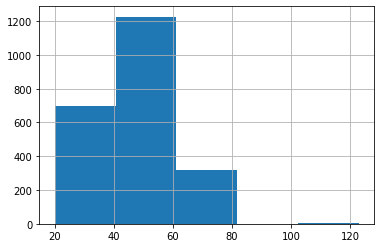

In [ ]:
#Membuat kolom group umur
#Check distribusi umur

df.Umur.hist(bins=5)
plt.show()

**Observasi**
* Terlihat umur yang paling muda adalah 20 dan yang paling tua adalah sekitar 85, sedangkan 120 sepertinya outlier.
* Apa yang menarik bagi anak berusia 10 tahun umumnya tidak akan menarik bagi anak berusia 60 tahun. Segmentasi usia berarti berfokus pada rentang usia yang paling berharga bagi produk atau layanan Anda. Kelompok usia demografis pemasaran biasanya 18-24, 25-34, 35-44, 45-54, 55-64, dan Olders <a href='https://www.pickfu.com/demographic-segmentation'>(Li, 2022)</a>.

In [ ]:
def age_group(x):
    if x >= 18 and x<25:
        age = '18-24'
    elif x>=25 and x<35:
        age = '25-34'
    elif x>=35 and x<45:
        age = '35-44'
    elif x>=45 and x<55:
        age = '45-54'
    elif x>=55 and x<65:
        age = '55-64'
    elif x>=65:
        age = 'Olders'
    else:
        age = 'None'
    return age

In [ ]:
df['Age_Group'] = df['Umur'].apply(lambda x: age_group(x))

In [ ]:
#membuat kolom total_spend
df['Total_Spend'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] +df['MntGoldProds']

In [ ]:
#membuat total_campaign 
df['Total_Campaign'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']

In [ ]:
# membuat total_transaksi
df['Total_Transaksi'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [ ]:
# membuat member_duration
# asumsikan tahun terakhir adalah 2016

df['Member_Duration'] = 2016 - df['Dt_Customer'].dt.year

In [ ]:
# menghitung conversion rate dengan definisi (#response / #visit)

df['Conversion_Rate'] = df['Response']/df['NumWebVisitsMonth']

In [ ]:
#check null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Umur                    0
Jumlah_Anak             0
Is_Parent               0
Age_Group               0
Total_Spend             0
Total_Campaign          0
Total_Transaksi         0
Member_Duration         0
Conversion_Rate        11
dtype: int64

In [ ]:
#check dimana nilai null pada conversion rate
df[df['Conversion_Rate'].isnull()][['Response','NumWebVisitsMonth','Conversion_Rate']]

,Response,NumWebVisitsMonth,Conversion_Rate
164,0,0,NaN
655,0,0,NaN
687,0,0,NaN
905,0,0,NaN
975,0,0,NaN
1773,0,0,NaN
1806,0,0,NaN
1910,0,0,NaN
1955,0,0,NaN
2132,0,0,NaN


In [ ]:
#karena 0/0 tak hingga, dapat diinputasi pada conversion ratenya sebagai 0
df['Conversion_Rate'].fillna(0, inplace=True)

In [ ]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Response,Umur,Jumlah_Anak,Is_Parent,Age_Group,Total_Spend,Total_Campaign,Total_Transaksi,Member_Duration,Conversion_Rate
1984,1406,1975,S1,Lajang,53201000.0,1,1,2013-12-02,49,280000,...,0,41,2,1,35-44,415000,0,22,3,0.0
76,1859,1972,S2,Menikah,75251000.0,0,0,2012-08-27,34,721000,...,1,44,0,0,35-44,1890000,0,19,4,0.2
1523,10795,1973,S3,Menikah,37401000.0,1,0,2014-06-05,14,19000,...,0,43,1,1,35-44,48000,0,7,2,0.0
1024,4240,1978,S1,Menikah,17345000.0,1,0,2012-03-11,79,4000,...,0,38,1,1,35-44,58000,0,7,4,0.0
2203,2736,1978,S1,Menikah,73807000.0,0,1,2013-02-01,88,366000,...,0,38,1,1,35-44,849000,0,23,3,0.0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Umur', 'Jumlah_Anak', 'Is_Parent', 'Age_Group', 'Total_Spend',
       'Total_Campaign', 'Total_Transaksi', 'Member_Duration',
       'Conversion_Rate'],
      dtype='object')

In [ ]:
# Drop kolom yang gak perlu 
# Seperti kolom yang sudah dilakukan aggregasi

drop_col = ['ID','Year_Birth','Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome', 'Complain', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']

df_eda = df.drop(drop_col, axis=1).copy()

In [ ]:
df_eda.sample(5)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebPurchases,Response,Umur,Jumlah_Anak,Is_Parent,Age_Group,Total_Spend,Total_Campaign,Total_Transaksi,Member_Duration,Conversion_Rate
2072,S1,Menikah,25293000.0,2013-09-15,51,1,0,47,1,1,45-54,37000,0,5,3,0.000000
1044,S1,Bertunangan,34728000.0,2013-07-30,2,1,1,30,1,1,25-34,36000,0,5,3,0.166667
2187,S3,Menikah,84117000.0,2014-11-05,60,7,0,60,0,0,55-64,1566000,1,24,2,0.000000
581,S1,Bertunangan,40689000.0,2013-03-18,69,7,0,65,1,1,Olders,444000,0,20,3,0.000000
940,D3,Lajang,64831000.0,2013-10-06,51,6,0,64,2,1,55-64,1120000,0,22,3,0.000000


In [ ]:
#Kelompokkan variabel sesuai tipe data

categorical_var = ['Education', 'Marital_Status', 'Jumlah_Anak', 'Total_Campaign', 'Member_Duration', 'Response', 'Is_Parent', 'Age_Group']
numerical_var = ['Income', 'Umur', 'Recency', 'Total_Spend', 'Total_Transaksi', 'Conversion_Rate', 'NumWebPurchases']

## Exploratory Data Analysis

### Univariate Analysis

#### Numerical Target with Distplot

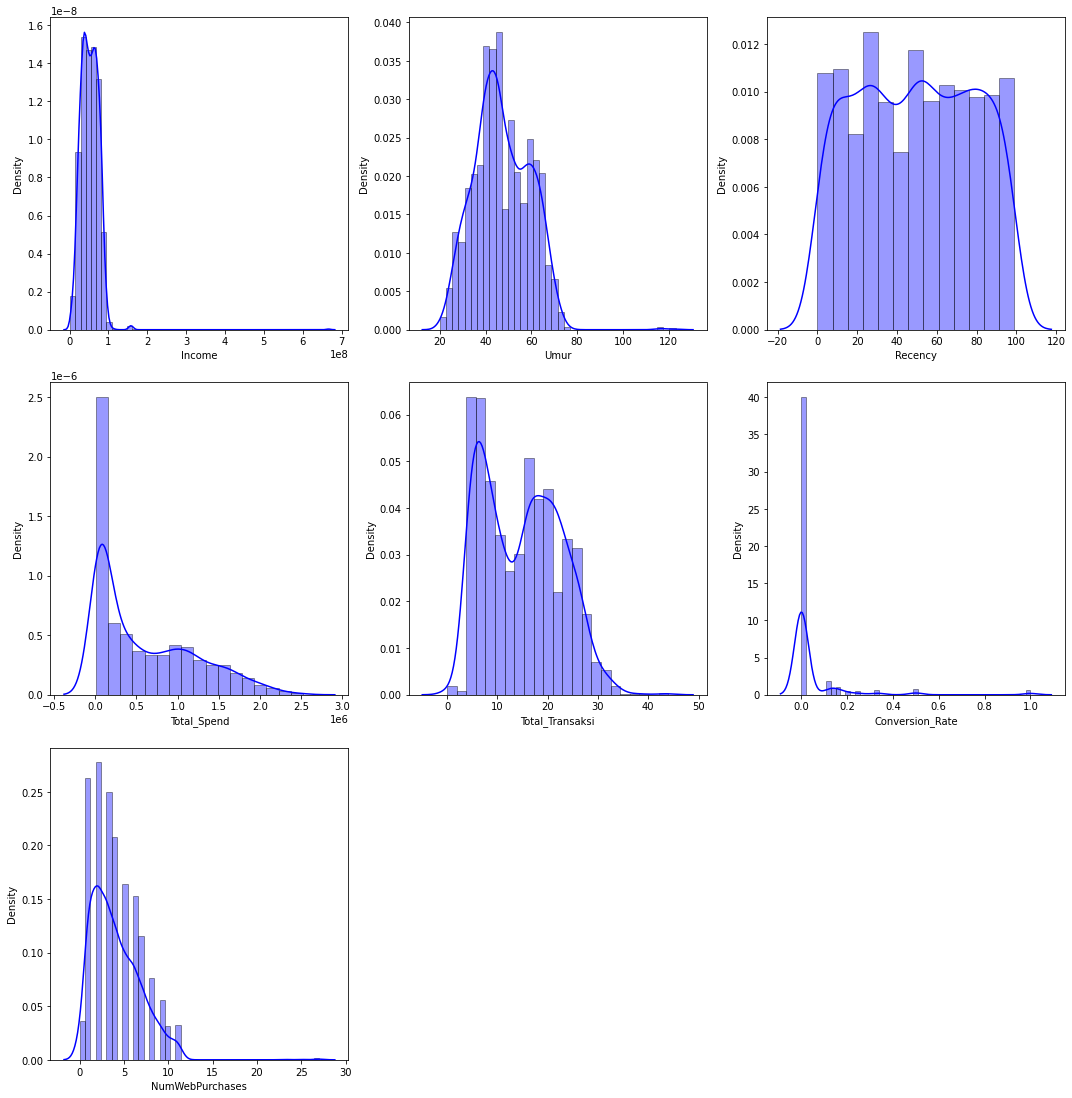

In [ ]:
plt.figure(figsize=(15, 20))
for i in range(0, len(numerical_var)):
    plt.subplot(4, 3,i+1)
    sns.distplot(df_eda[numerical_var[i]], color='blue', hist_kws=dict(linewidth=1, edgecolor='k'))
    plt.tight_layout()

**Output**
* Dilihat kolom income, Total_Spend, Total_Campaign, Conversion_Rate, NumWebPurchases mengalami skewness
* Dilihat bahwa kebanyakan nilai dari masing-masing kategori sangat besar sehingga perlu di scaling
* Kebanyakan customer memiliki income dikisaran 6.000.000 - 8.000.000
* customer berada dalam usia antara 20 hingga 80, 120 kemungkinan outliers
* recency dari pelanggan diantara 10-90
* total transaksi terbanyak antara 4-7 x
* total_spend yang dihabiskan customer dikisaran 20000 - 50000
* terlihat conversion rate sangat rendah
* customer mengunjungi web bulanan mayoritas di kisaran 1 - 4

#### Categorical with Countplot

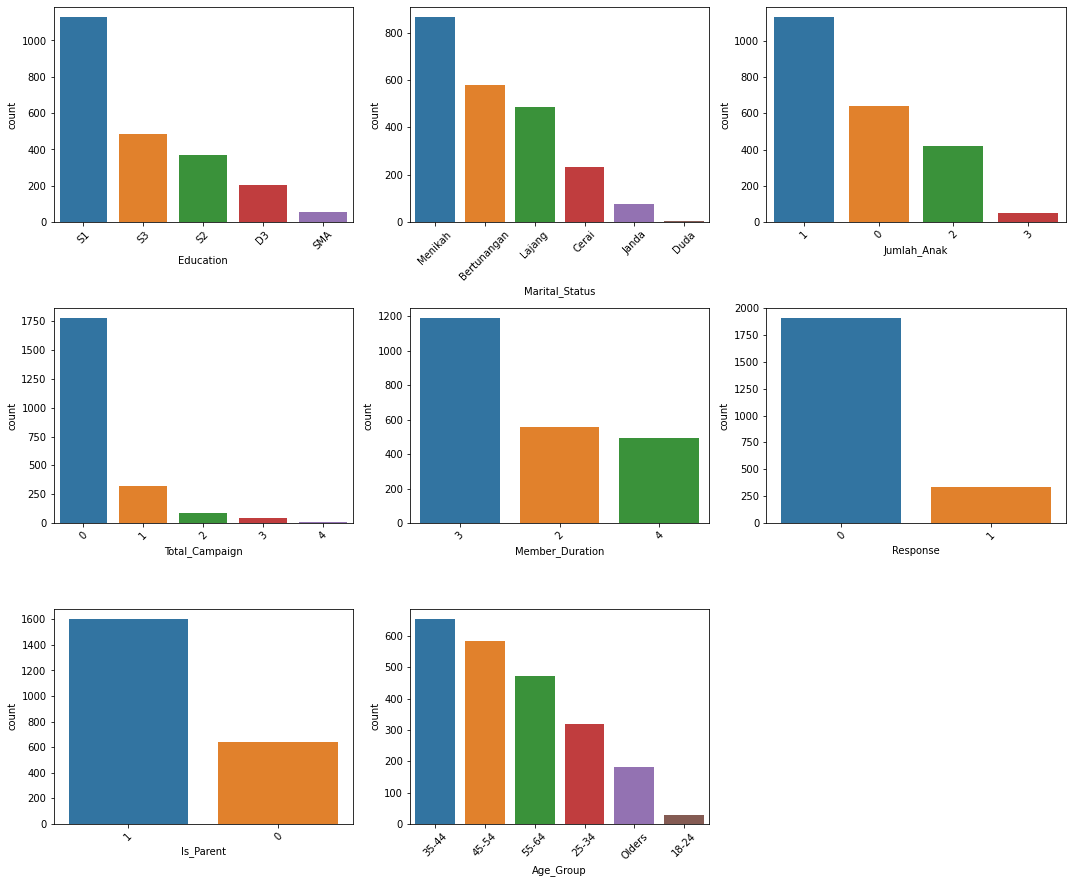

In [ ]:
plt.figure(figsize=(15, 20))
for i in range(0, len(categorical_var)):
    plt.subplot(5, 3,i+1)
    sns.countplot(df_eda[categorical_var[i]], order=df[categorical_var[i]].value_counts().index)
    plt.xticks(rotation=45)
    plt.tight_layout()

**Observasi**
* Customer didominasi oleh latar pendidikan S1 dan S3
* Kebanyakan customer berstatus Menikah, Tunangan dan Lajang
* Terlihat bahwa kebanyakan customer menolak response
* Sebagian besar adalah orang tua
* Didominasi oleh umur >35an keatas
* customer rata-rata memiliki satu anak
* dilihat dari total_campaign mayoritas menolka sepertinya campaign kurang efektik
* customer berlangganan mayoritas 3 tahun


### Bivariate Analysis

#### Numerical - ConvertionRate

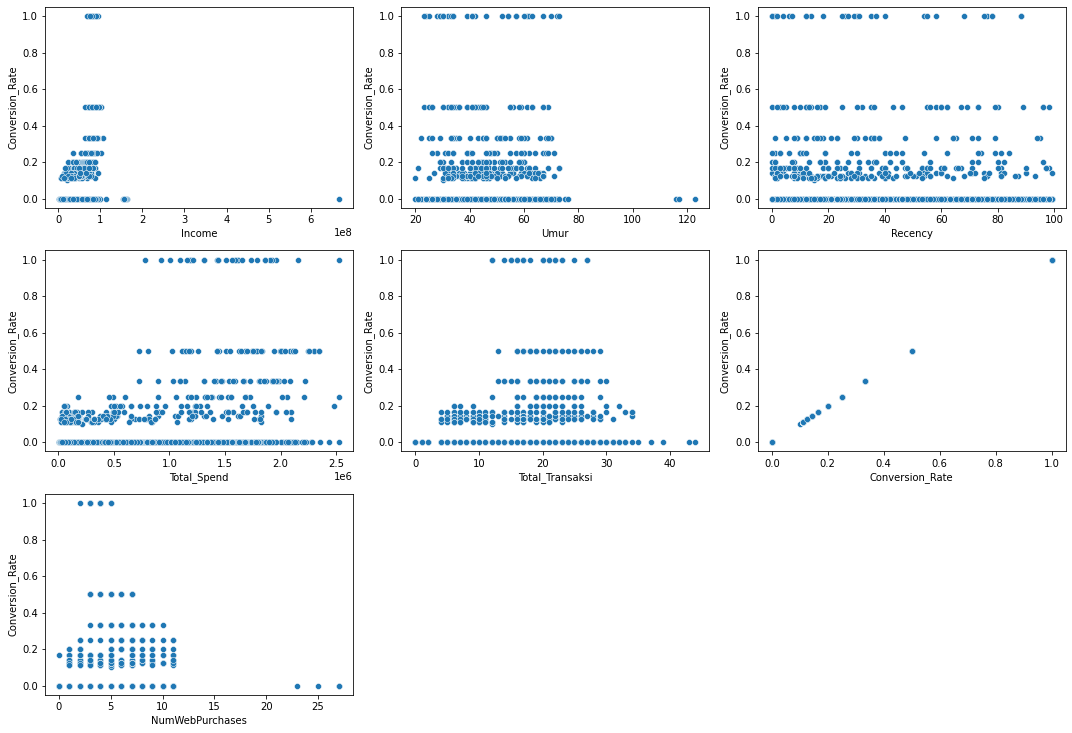

In [ ]:
plt.figure(figsize=(15, 20))
for i in range(0, len(numerical_var)):
    plt.subplot(6, 3,i+1)
    sns.scatterplot(x = df_eda[numerical_var[i]], y=df['Conversion_Rate'])
    plt.tight_layout()

**Observasi**
- Tidak ada kolom yang berkolerasi baik dengan conversion_rate

#### Numerical - Response

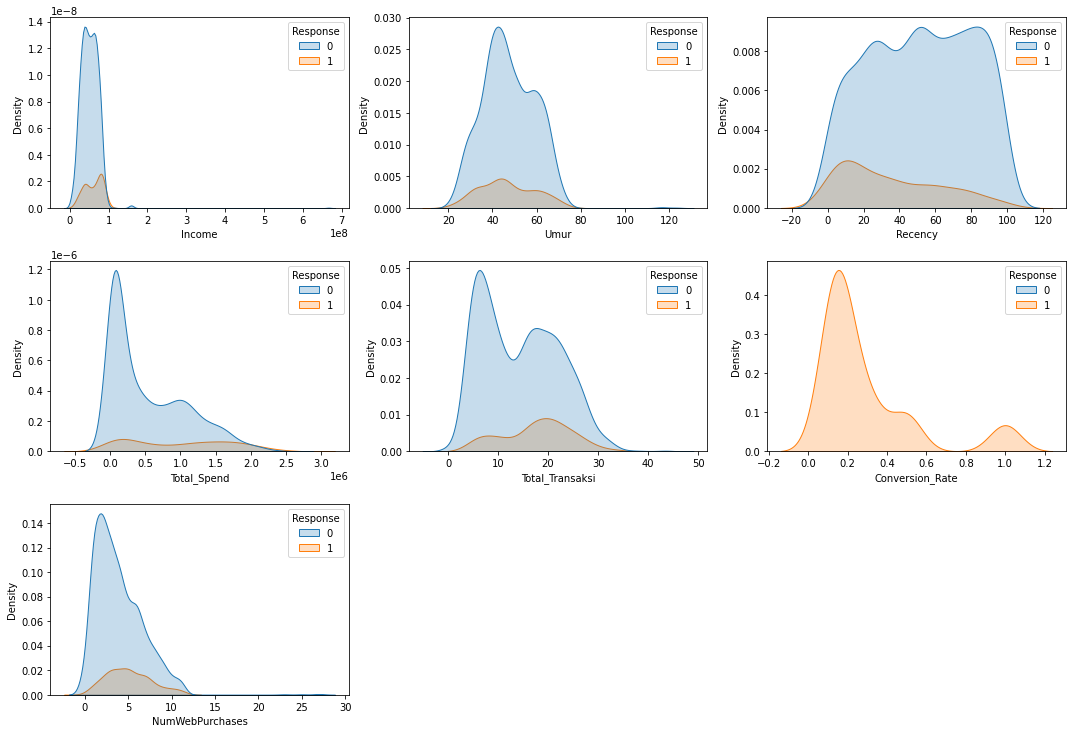

In [ ]:
plt.figure(figsize=(15, 20))
for i in range(0, len(numerical_var)):
    plt.subplot(6, 3,i+1)
    sns.kdeplot(x = df_eda[numerical_var[i]], hue=df['Response'], shade=True)
    plt.tight_layout()

#### Numerical - Categorical

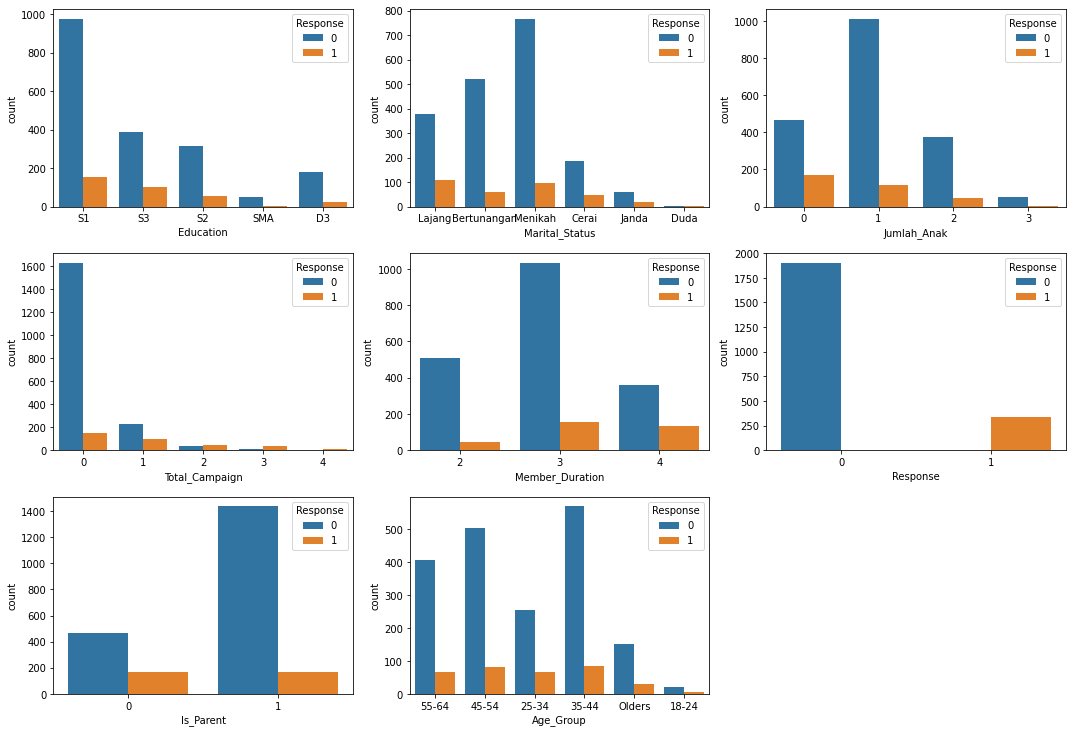

In [ ]:
plt.figure(figsize=(15, 20))
for i in range(0, len(categorical_var)):
    plt.subplot(6, 3,i+1)
    sns.countplot(x = df_eda[categorical_var[i]], hue=df['Response'])
    plt.tight_layout()

#### Numerical - Numerical

<Figure size 1080x1440 with 0 Axes>

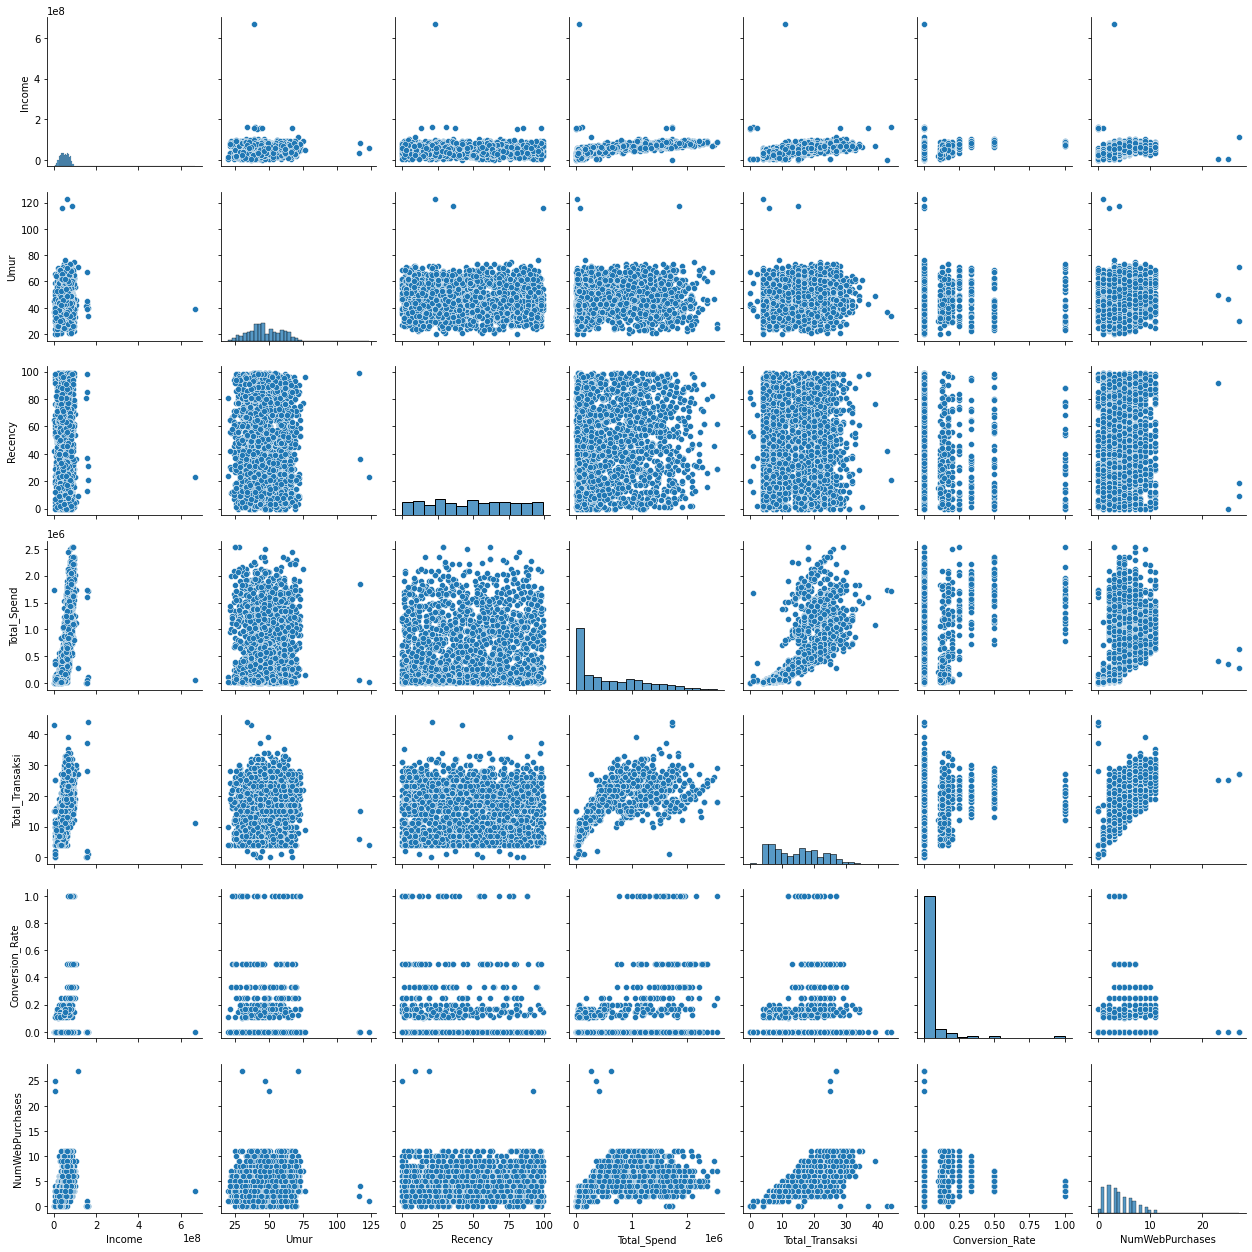

In [ ]:
plt.figure(figsize=(15, 20))
sns.pairplot(df_eda[numerical_var])
plt.tight_layout()

**Observasi**
- ada hubungan yang memiliki korelasi antara 
    - income - total_spend 
    - income - total_transaksi 
    - income - NumWebPurchases 
    - NumWebPurchases - Total Transaksi
    - total_spend - total_transaksi 
- dapat disimpulkan semakin tinggi income pengeluaran dan transaksi semakin banyak
- lainnya disimpulkan weak correlation

### Multivariate Analysis

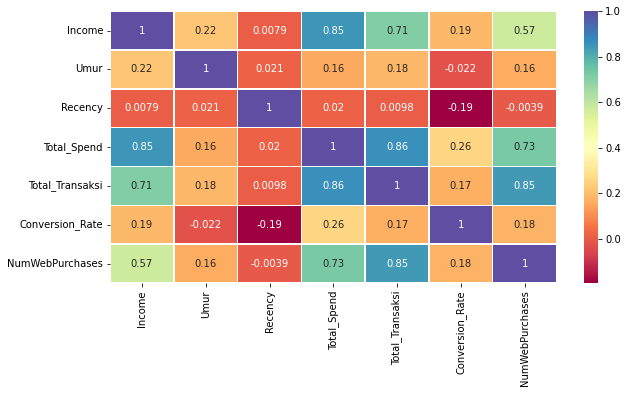

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_eda[numerical_var].corr(method='spearman'), cmap= 'Spectral', annot=True, linewidths=0.5)
plt.show()

**Output**
- Income - Total Spend, Income - Total Transaksi, Total_Spend - NumWebPurchases, Total_Spend - Total_Transaksi memiliki korelasi yang tinggi
- Income - NumWebPurchases, memiliki korelasi yang moderate

### Bussiness Insight

In [ ]:
df_eda.groupby(df_eda['Age_Group']).agg({'Umur':'count','Response':'mean','Conversion_Rate':'mean'}).sort_values(by='Conversion_Rate', ascending=False)

,Umur,Response,Conversion_Rate
Age_Group,,,
18-24,28,0.214286,0.111111
25-34,318,0.204403,0.075120
Olders,182,0.164835,0.055392
55-64,473,0.141649,0.042437
35-44,654,0.129969,0.032680
45-54,585,0.138462,0.032222


#### Conversion Rate and Categorical Variabel

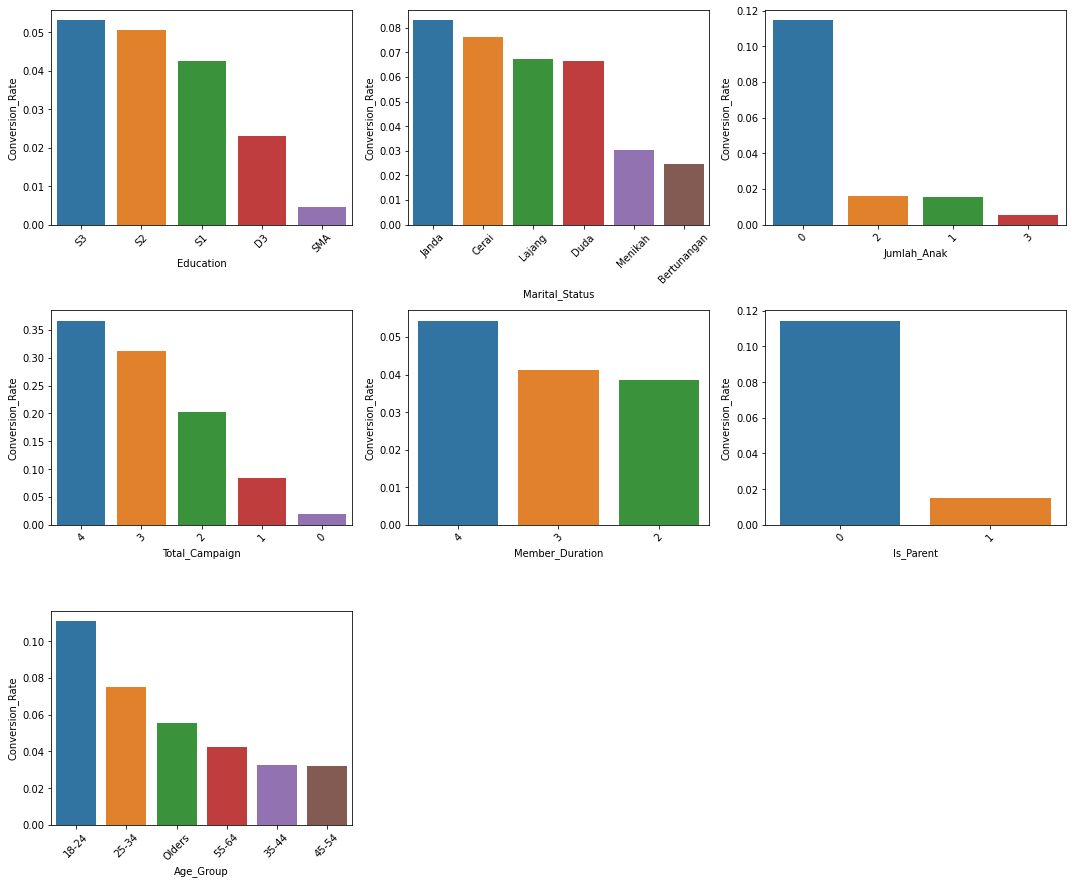

In [ ]:
cat = categorical_var.copy()
cat.remove('Response')

plt.figure(figsize=(15, 20))

for i in range(0, len(cat)):
    cr = df.groupby(df_eda[cat[i]]).agg({'Umur':'count','Response':'mean','Conversion_Rate':'mean'}).sort_values(by='Conversion_Rate', ascending=False)
    plt.subplot(5, 3,i+1)
    sns.barplot(x=cr.index, y=cr['Conversion_Rate'], order=cr.index)
    plt.xticks(rotation=45)
    plt.tight_layout()

**Output**<br>
Karakteristik Customer merespon campaign
- Customer yang tidak memiliki 'hubungan' yang mengikat
- Usia diantara 18 - 34
- Total Campaign 4 atau 3
- Tidak memiliki anak/bukan orang tua
- Pendidikan Tinggi dari S1 - S3

#### Conversion Rate and Numerical Variabel

In [ ]:
#check numerical feature
df_eda[numerical_var]

,Income,Umur,Recency,Total_Spend,Total_Transaksi,Conversion_Rate,NumWebPurchases
0,58138000.0,59,58,1617000,25,0.142857,8
1,46344000.0,62,38,27000,6,0.000000,1
2,71613000.0,51,26,776000,21,0.000000,8
3,26646000.0,32,26,53000,8,0.000000,2
4,58293000.0,35,94,422000,19,0.000000,5
...,...,...,...,...,...,...,...
2235,61223000.0,49,46,1341000,18,0.000000,9
2236,64014000.0,70,56,444000,22,0.000000,8
2237,56981000.0,35,91,1241000,19,0.000000,2
2238,69245000.0,60,8,843000,23,0.000000,6


In [ ]:
num_cr = df_eda[numerical_var].copy()
num_cr

,Income,Umur,Recency,Total_Spend,Total_Transaksi,Conversion_Rate,NumWebPurchases
0,58138000.0,59,58,1617000,25,0.142857,8
1,46344000.0,62,38,27000,6,0.000000,1
2,71613000.0,51,26,776000,21,0.000000,8
3,26646000.0,32,26,53000,8,0.000000,2
4,58293000.0,35,94,422000,19,0.000000,5
...,...,...,...,...,...,...,...
2235,61223000.0,49,46,1341000,18,0.000000,9
2236,64014000.0,70,56,444000,22,0.000000,8
2237,56981000.0,35,91,1241000,19,0.000000,2
2238,69245000.0,60,8,843000,23,0.000000,6


##### Grouping Each Numerical Feature by Quantile

In [ ]:
df.Income.quantile([0, 0.25, 0.50, 0.75, 1])

0.00      1730000.0
0.25     35303000.0
0.50     51381500.0
0.75     68522000.0
1.00    666666000.0
Name: Income, dtype: float64

Berdasarkan quartile kita dapat membagi income customer kedalam tiga kategory
- Low Income dengan < 25%
- Middle Income dengan < 50%
- High Income > 75%

In [ ]:
def income_group(x):
    if x <= df.Income.quantile(0.25):
        inc = 'Low Income'
    elif x > df.Income.quantile(0.25) and x < df.Income.quantile(0.75):
        inc = 'Middle Income'
    elif x >= df.Income.quantile(0.75):
        inc = 'High Income'
    else:
        inc = 'Unknown'
    return inc

In [ ]:
df.Total_Spend.quantile([0, 0.25, 0.50, 0.75, 1])

0.00       5000.0
0.25      68750.0
0.50     396000.0
0.75    1045500.0
1.00    2525000.0
Name: Total_Spend, dtype: float64

Hampir sama dengan income, spend juga dibagi berdasarkan tiga kategori
- frugal / hemat
- extravagant / boros
- moderate / sedang

In [ ]:
def spend_group(x):
    if x <= df.Total_Spend.quantile(0.25):
        y = 'Frugal'
    elif x > df.Total_Spend.quantile(0.25) and x < df.Total_Spend.quantile(0.75):
        y = 'Moderate'
    elif x >= df.Total_Spend.quantile(0.75):
        y = 'Extravagant'
    else:
        y = 'Unknown'
    return y

In [ ]:
df.Total_Transaksi.quantile([0, 0.25, 0.50, 0.75, 1])

0.00     0.0
0.25     8.0
0.50    15.0
0.75    21.0
1.00    44.0
Name: Total_Transaksi, dtype: float64

Demikian juga transaksi yaitu:
 - Kecil
 - Sedang
 - Tinggi

In [ ]:
def transaction_group(x):
    if x <= df.Total_Transaksi.quantile(0.25):
        y = 'Low'
    elif x > df.Total_Transaksi.quantile(0.25) and x < df.Total_Transaksi.quantile(0.75):
        y = 'Middle'
    elif x >= df.Total_Transaksi.quantile(0.75):
        y = 'High'
    else:
        y = 'Unknown'
    return y

In [ ]:
df.NumWebPurchases.quantile([0, 0.25, 0.50, 0.75, 1])

0.00     0.0
0.25     2.0
0.50     4.0
0.75     6.0
1.00    27.0
Name: NumWebPurchases, dtype: float64

In [ ]:
def numwebpurchases_group(x):
    if x <= df.NumWebPurchases.quantile(0.25):
        y = 'Two Times'
    elif x > df.NumWebPurchases.quantile(0.25) and x < df.NumWebPurchases.quantile(0.75):
        y = '3-5 Times'
    elif x >= df.NumWebPurchases.quantile(0.75):
        y = 'More than 5 Times'
    else:
        y = 'Unknown'
    return y

In [ ]:
df.Recency.quantile([0, 0.25, 0.50, 0.75, 1])

0.00     0.0
0.25    24.0
0.50    49.0
0.75    74.0
1.00    99.0
Name: Recency, dtype: float64

In [ ]:
def recency_group(x):
    if x <= df.Recency.quantile(0.25):
        y = '<= 24'
    elif x > df.Recency.quantile(0.25) and x < df.Recency.quantile(0.75):
        y = '25-73'
    elif x >= df.Recency.quantile(0.75):
        y = '>= 74'
    else:
        y = 'Unknown'
    return y

In [ ]:
num_cr['Income_Group'] = df.Income.apply(lambda x: income_group(x))
num_cr['Spend_Group'] = df.Total_Spend.apply(lambda x: spend_group(x))
num_cr['Transaction_Group'] = df.Total_Transaksi.apply(lambda x: transaction_group(x))
num_cr['NumWebPurchases_Group'] = df.NumWebPurchases.apply(lambda x: numwebpurchases_group(x))
num_cr['Recency_Group'] = df.Recency.apply(lambda x: recency_group(x))

In [ ]:
num_cr_col = num_cr.columns.to_list()
for x in numerical_var:
    num_cr_col.remove(x)

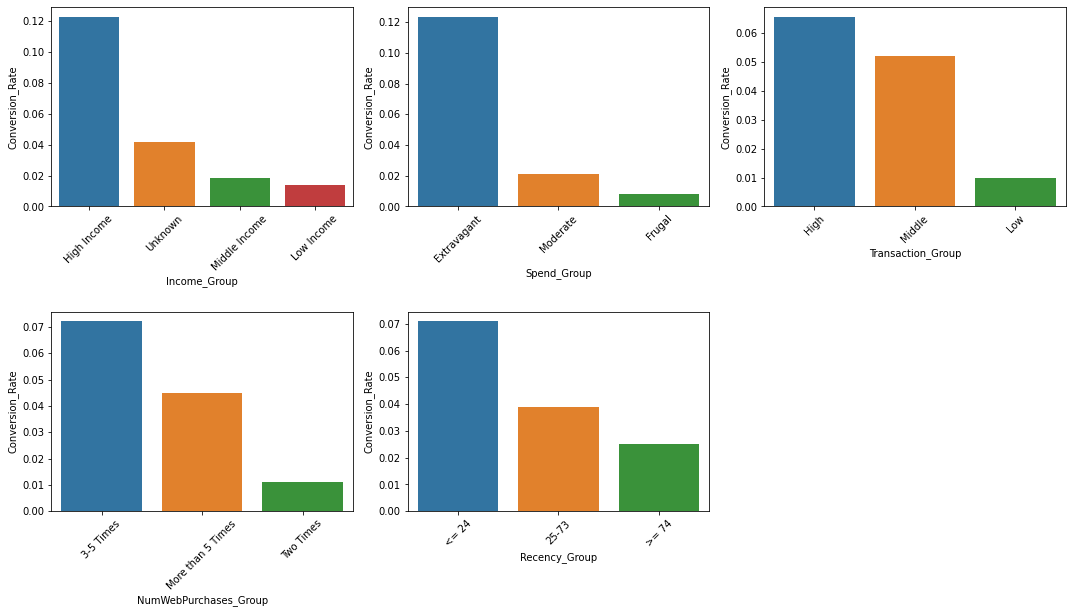

In [ ]:
plt.figure(figsize=(15, 20))

for i in range(0, len(num_cr_col)):
    cr = df.groupby(num_cr[num_cr_col[i]]).agg({'Umur':'count','Conversion_Rate':'mean'}).sort_values(by='Conversion_Rate', ascending=False)
    plt.subplot(5, 3,i+1)
    sns.barplot(x=cr.index, y=cr['Conversion_Rate'], order=cr.index)
    plt.xticks(rotation=45)
    plt.tight_layout()

**Output**<br>
Karakteristik Customer merespon campaign
- High Income lebih besar dari 68.522.000 
- Total Spend lebih besar dari 1.045.500 / Extravagant Customer
- Total Transaksi lebih dari 4 kali
- Mengunjungi Halaman Web antara 3-5 kali
- Nilai Recency dibawah 25

#### Kesimpulan

* Secara Korelasi tidak ada feature yang berhubungan kuat dengan conversion rate
* Income - Total Spend, Income - Total Transaksi, Total_Spend - NumWebPurchases, Total_Spend - Total_Transaksi memiliki korelasi yang tinggi
* Income - NumWebPurchases, memiliki korelasi yang moderate
* Terlihat bahwa mayoritas customer berstatus marital 'yang mengikat' namun secara CR justru 'hubungan yang tidak mengikat yang lebih tinggi'
* Secara usia mayoritas pengguna berumur 34 - 45, akan tetapi umur yang 18 - 34 yang memiliki CR yang lebih tinggi/ merespon campaign
* Sangat masuk akal apabila yang memiliki income tinggi akan cenderung merespon campaign di karenakan customer ini biasanya memiliki uang yang lebih dengan dibuktikan total spend yang lebih tinggi dengan total transaksi yang terbilang sering, hal ini bisa dilihat dari jumlah kunjungan ke halaman web.

Karakteristik Customer merespon campaign

* Customer tidak memiliki 'hubungan yang mengikat'
* Usia diantara 18 - 34
* Total Campaign 4 atau 3
* Tidak memiliki anak/bukan orang tua
* Pendidikan Tinggi dari S1 - S3
* Income lebih besar dari 68.522.000 / High 
* Total Spend lebih besar dari 1.045.500 / Extravagant Customer
* Total Transaksi lebih dari 4 kali
* Mengunjungi Halaman Web antara 3-5 kali
* Nilai Recency dibawah 25


## Data Cleaning and Preprocessing

In [ ]:
dfx = df.copy()

In [ ]:
dfx

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Response,Umur,Jumlah_Anak,Is_Parent,Age_Group,Total_Spend,Total_Campaign,Total_Transaksi,Member_Duration,Conversion_Rate
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,...,1,59,0,0,55-64,1617000,0,25,4,0.142857
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,...,0,62,2,1,55-64,27000,0,6,2,0.000000
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,51,0,0,45-54,776000,0,21,3,0.000000
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,...,0,32,1,1,25-34,53000,0,8,2,0.000000
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,35,1,1,35-44,422000,0,19,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,...,0,49,1,1,45-54,1341000,0,18,3,0.000000
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-10-06,56,406000,...,0,70,3,1,Olders,444000,1,22,2,0.000000
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,...,0,35,0,0,35-44,1241000,1,19,2,0.000000
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,...,0,60,1,1,55-64,843000,0,23,2,0.000000


### Handle Missing Value

Dari proses EDA sebelumnya terlihat kolom Income terdapat missing value.

In [ ]:
print('persentase null value : ', df['Income'].isnull().sum()/df.shape[0])

persentase null value :  0.010714285714285714


Adapun threatment yang dapat kita lakukan adalah dengan melakukan imputasi median pada kolom tersebut.

In [ ]:
# imputasi median
dfx['Income'].fillna(dfx['Income'].median(), inplace=True)

In [ ]:
#check missing value again

dfx.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Umur                   0
Jumlah_Anak            0
Is_Parent              0
Age_Group              0
Total_Spend            0
Total_Campaign         0
Total_Transaksi        0
Member_Duration        0
Conversion_Rate        0
dtype: int64

### Feature Selection

Adapun feature yang dipilih adalah feature yang dilakukan saat eda / hasil dari feature engineering dengan mengurangi dimensi seperti lebih memilih total campaign dibanding AcceptedCmp1, AcceptedCmp2 dst

In [ ]:
drop_col

['ID',
 'Year_Birth',
 'Z_CostContact',
 'Z_Revenue',
 'Kidhome',
 'Teenhome',
 'Complain',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2']

In [ ]:
drop_col.append('Dt_Customer')
drop_col.append('Age_Group')

In [ ]:
df_new = dfx.drop(drop_col, axis=1).copy()

### Handle Outlier with Z Score

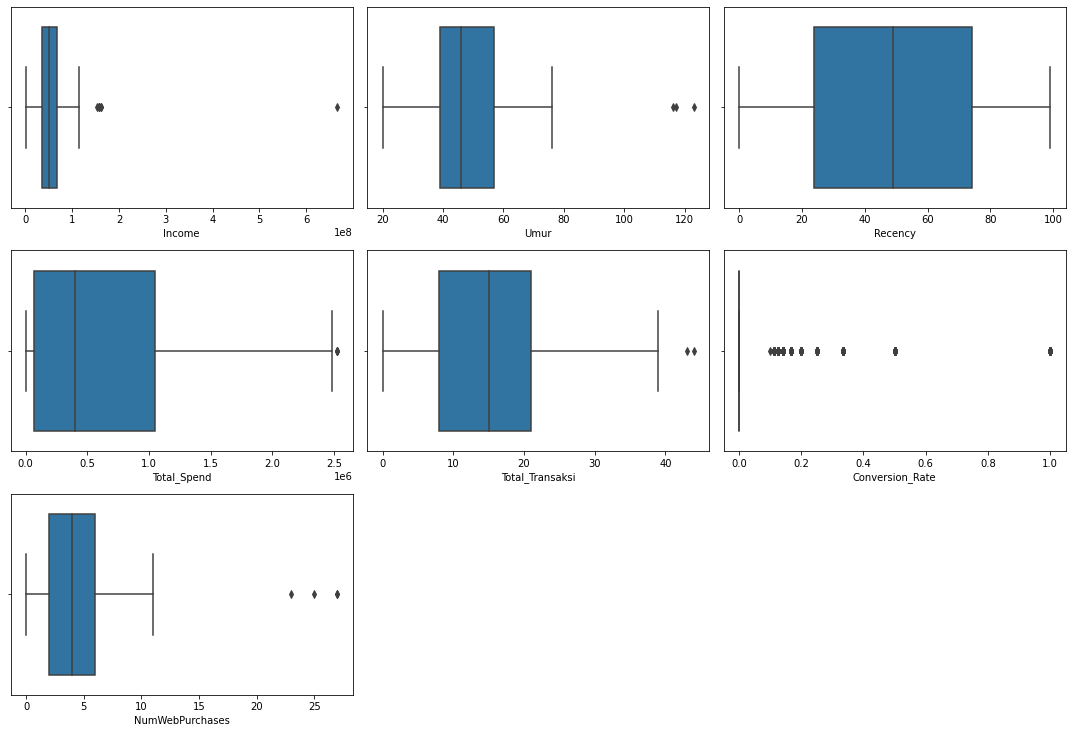

In [ ]:
#plot numerical var to check outliers
plt.figure(figsize=(15, 20))
for i in range(0, len(numerical_var)):
    plt.subplot(6, 3,i+1)
    sns.boxplot(x = df_new[numerical_var[i]])
    plt.tight_layout()

In [ ]:
print('Jumlah baris sebelum memfilter outlier: ', len(df_new))

Jumlah baris sebelum memfilter outlier:  2240


In [ ]:
# z-score
z_score = np.abs(stats.zscore(df_new[numerical_var]))
df_new = df_new[~(z_score > 3).any(axis=1)]

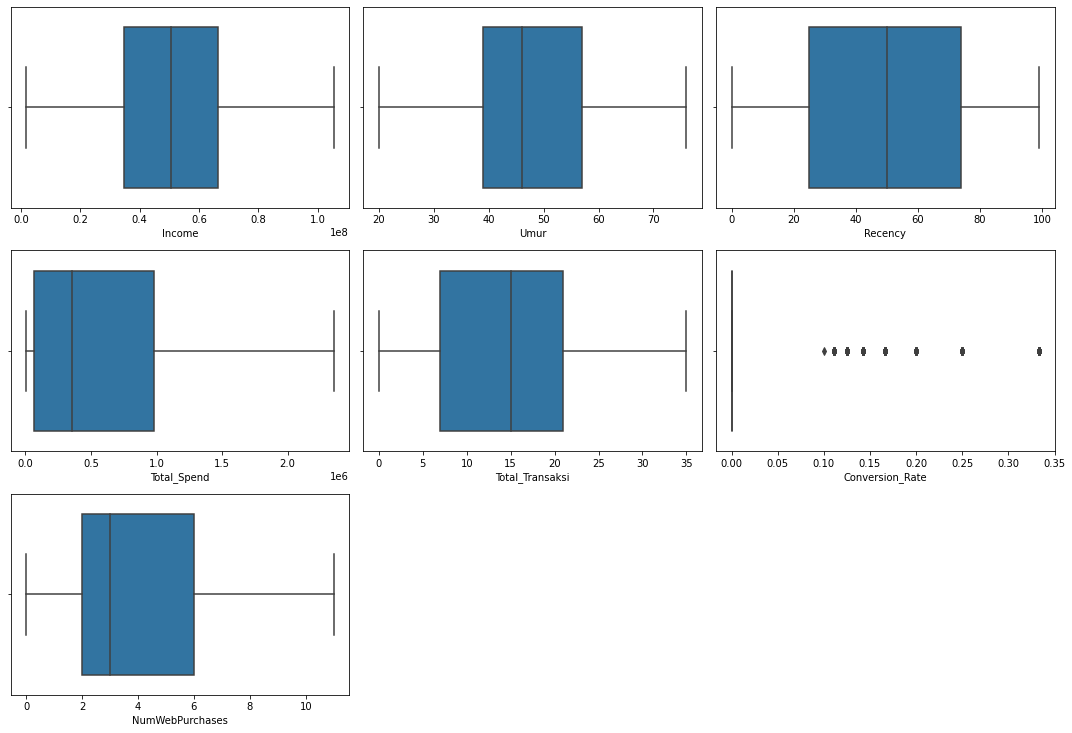

In [ ]:
#plot after remove outlier with z-score
plt.figure(figsize=(15, 20))
for i in range(0, len(numerical_var)):
    plt.subplot(6, 3,i+1)
    sns.boxplot(x = df_new[numerical_var[i]])
    plt.tight_layout()

In [ ]:
print('Jumlah baris setelah memfilter outlier: ', len(df_new))

Jumlah baris setelah memfilter outlier:  2149


### Feature Encoding

Sebelum melakukan pemodelan, terlebih dahulu feature kategorikal dilakukan encoding. terlihat ada dua feature education dan marital_status
* untuk education dilakukan dengan LE dengan mapping
* sedangkan marital_status dilakukan dengan OHE

In [ ]:
df_last = df_new.copy()

In [ ]:
df['Education'].value_counts().index

Index(['S1', 'S3', 'S2', 'D3', 'SMA'], dtype='object')

In [ ]:
df_new['Education'] = df_new['Education'].map({
    'S1' : 3, 
    'S3' : 5, 
    'S2' : 4, 
    'D3' : 2, 
    'SMA' : 1
})

In [ ]:
df_marital = pd.get_dummies(df['Marital_Status'],  prefix='Marital_Status')
df_marital

,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
2235,0,0,0,0,0,1
2236,1,0,0,0,0,0
2237,0,1,0,0,0,0
2238,1,0,0,0,0,0


In [ ]:
#drop marital_status kolom
df_new.drop('Marital_Status', axis=1, inplace=True)

In [ ]:
#concat

df_new = df_new.merge(df_marital, left_index=True, right_index=True)
df_new

,Education,Income,Recency,NumWebPurchases,Response,Umur,Jumlah_Anak,Is_Parent,Total_Spend,Total_Campaign,Total_Transaksi,Member_Duration,Conversion_Rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,3,58138000.0,58,8,1,59,0,0,1617000,0,25,4,0.142857,0,0,0,0,1,0
1,3,46344000.0,38,1,0,62,2,1,27000,0,6,2,0.000000,0,0,0,0,1,0
2,3,71613000.0,26,8,0,51,0,0,776000,0,21,3,0.000000,1,0,0,0,0,0
3,3,26646000.0,26,2,0,32,1,1,53000,0,8,2,0.000000,1,0,0,0,0,0
4,5,58293000.0,94,5,0,35,1,1,422000,0,19,2,0.000000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,61223000.0,46,9,0,49,1,1,1341000,0,18,3,0.000000,0,0,0,0,0,1
2236,5,64014000.0,56,8,0,70,3,1,444000,1,22,2,0.000000,1,0,0,0,0,0
2237,3,56981000.0,91,2,0,35,0,0,1241000,1,19,2,0.000000,0,1,0,0,0,0
2238,4,69245000.0,8,6,0,60,1,1,843000,0,23,2,0.000000,1,0,0,0,0,0


### Feature Standarization

Karena nilai dibeberapa feature memiliki perbandaan rentang nilai yang sangat besar kita perlu menstandarisasinya agar konsisten, karena beberapa feature sebaran datanya tidak normal, disini kita akan menggunakan 'StandardScaler' dan 'MinMax' untuk beberapa kolom kategorikal yang memiliki nilai unik lebih dari 2

In [ ]:
numerical_var

['Income',
 'Umur',
 'Recency',
 'Total_Spend',
 'Total_Transaksi',
 'Conversion_Rate',
 'NumWebPurchases']

In [ ]:
categorical_select = ['Education', 'Jumlah_Anak', 'Total_Campaign', 'Member_Duration']

In [ ]:
scaler = StandardScaler()
minmax = MinMaxScaler()

In [ ]:
df_scaled = df_new.copy()

for col in numerical_var:
  df_scaled[col] = scaler.fit_transform(df_scaled[[col]])

for col in categorical_select:
  df_scaled[col] = minmax.fit_transform(df_scaled[[col]])


In [ ]:
df_scaled

,Education,Income,Recency,NumWebPurchases,Response,Umur,Jumlah_Anak,Is_Parent,Total_Spend,Total_Campaign,Total_Transaksi,Member_Duration,Conversion_Rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
0,0.50,0.379326,0.296756,1.489658,1,1.018104,0.000000,0,1.837489,0.00,1.361511,1.0,1.904795,0,0,0,0,1,0
1,0.50,-0.212113,-0.396315,-1.148549,0,1.277028,0.666667,1,-0.948293,0.00,-1.136887,0.0,-0.343687,0,0,0,0,1,0
2,0.50,1.055062,-0.812157,1.489658,0,0.327641,0.000000,0,0.364003,0.00,0.835532,0.5,-0.343687,1,0,0,0,0,0
3,0.50,-1.199918,-0.812157,-0.771662,0,-1.312210,0.333333,1,-0.902740,0.00,-0.873898,0.0,-0.343687,1,0,0,0,0,0
4,1.00,0.387098,1.544284,0.358998,0,-1.053286,0.333333,1,-0.256228,0.00,0.572543,0.0,-0.343687,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.50,0.534030,-0.119086,1.866545,0,0.155025,0.333333,1,1.353919,0.00,0.441048,0.5,-0.343687,0,0,0,0,0,1
2236,1.00,0.673992,0.227449,1.489658,0,1.967492,1.000000,1,-0.217682,0.25,0.967027,0.0,-0.343687,1,0,0,0,0,0
2237,0.50,0.321305,1.440323,-0.771662,0,-1.053286,0.000000,0,1.178713,0.25,0.572543,0.0,-0.343687,0,1,0,0,0,0
2238,0.75,0.936313,-1.435921,0.735885,0,1.104412,0.333333,1,0.481391,0.00,1.098522,0.0,-0.343687,1,0,0,0,0,0


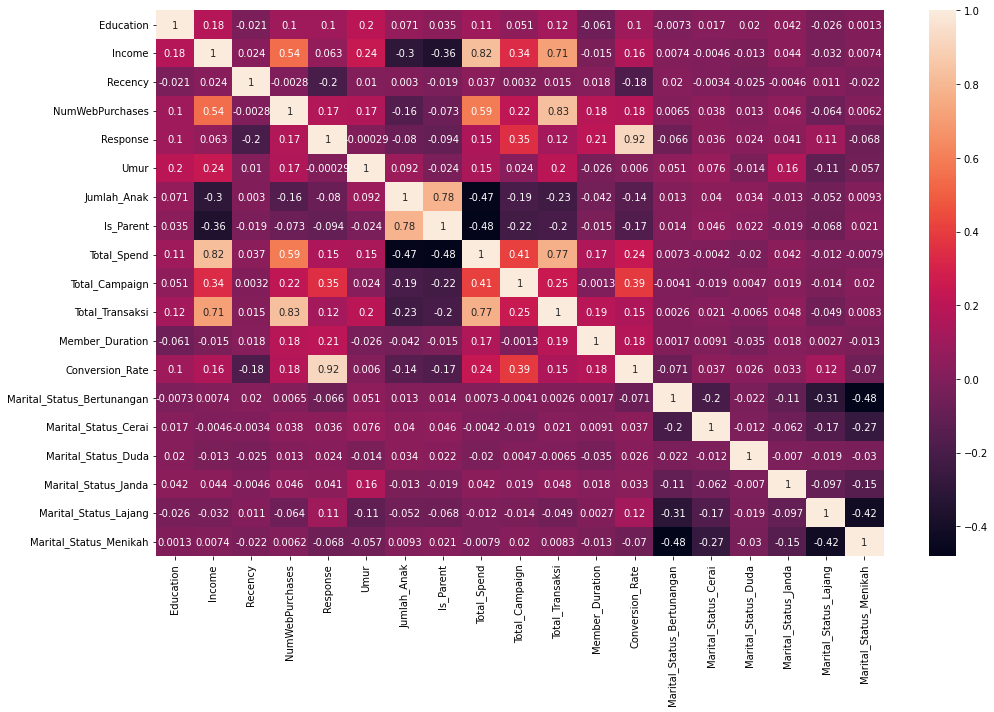

In [ ]:
#check if there are redundant
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(), annot=True)
plt.tight_layout()

Terlihat tidak ada feature yang redundan, setalah data preprocessing, maka akan dilakukan pemodelan

## Modelling

### Elbow Method

Untuk mencari nilai klaster terbaik

In [ ]:
inertia = list() # list to save inertia's score
silhoutte = list() # list to save silhoutte's score
nilai_k = range(1,16) # 1 sampai 15

for k in nilai_k :
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_new)

    #Elbow
    inertia.append(model.inertia_)

    if k != 1: # silhoutte dimulai dari 2
      #Silhoutte Score
      pred = model.predict(df_new)
      score_euclidean = silhouette_score(df_new, pred, metric='euclidean')
      silhoutte.append(score_euclidean)

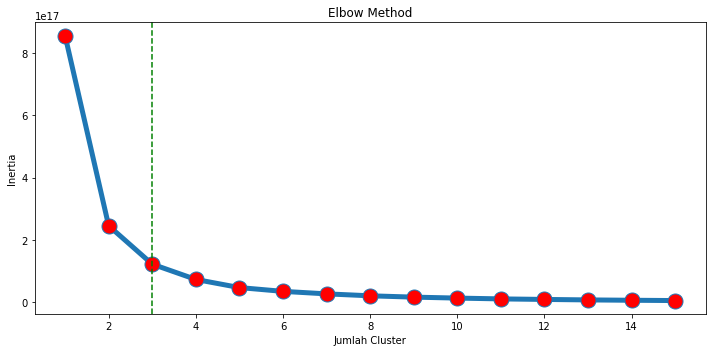

In [ ]:
#Elbow Plot

plt.figure(figsize=(10, 5))
plt.plot(nilai_k, inertia, '-o', linewidth=5, markersize=15, markerfacecolor='red')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.axvline(x=3, color='green', linestyle='--')
plt.tight_layout()
plt.show()

### K-Means Clustering with K=3

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_new)
df_new['clusters'] = kmeans.labels_

### Evaluate Clusters with Silhoutte Score

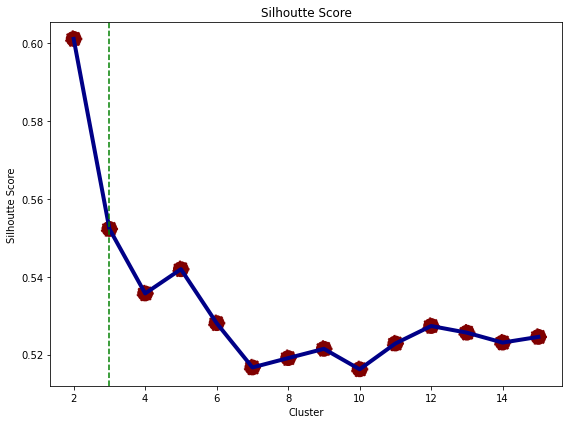

In [ ]:
# Silhoutte Score Plot

plt.figure(figsize=(8, 6))
sns.lineplot(x=nilai_k[1:], y=silhoutte, color='#000087', linewidth = 4)
sns.scatterplot(x=nilai_k[1:], y=silhoutte, s=300, color='#800000',  linestyle='--')
plt.xlabel('Cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score')
plt.axvline(x=3, color='green', linestyle='--')
plt.tight_layout()
plt.show()

### Visualization Cluster with PCA

Untuk melihat seberapa baik pemisahan klaster.

In [ ]:
# PCA for Visualization
pca = PCA(n_components=2)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)

In [ ]:
#make PCA dataframe's
df_pca = pd.DataFrame(X_pca, columns=['pca1','pca2'])
df_pca['cluster'] = kmeans.labels_
df_last['cluster'] = kmeans.labels_

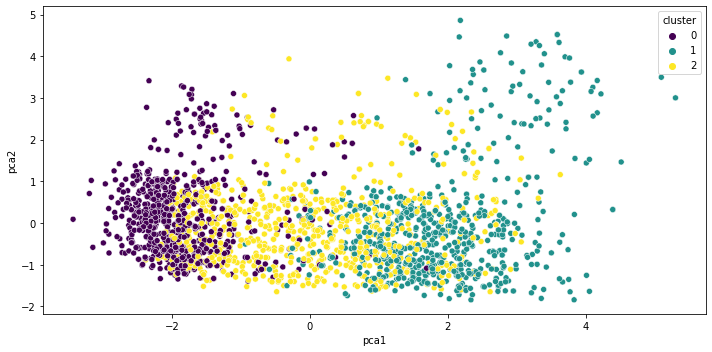

In [ ]:
# Plot PCA
plt.figure(figsize=(10,5))
sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = df_pca, palette = 'viridis')
plt.tight_layout()
plt.show()

## Model Insight

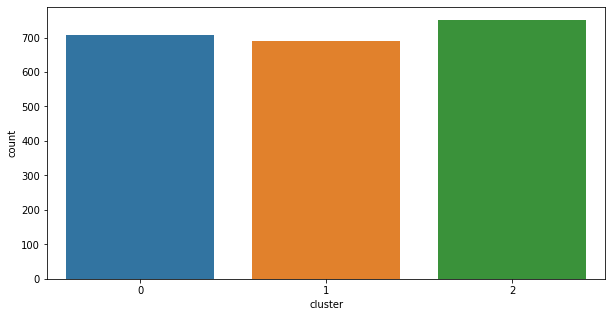

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df_last['cluster'])
plt.show()

In [ ]:
df_last.groupby('cluster').mean().round(2)[numerical_var]

,Income,Umur,Recency,Total_Spend,Total_Transaksi,Conversion_Rate,NumWebPurchases
cluster,,,,,,,
0,27948220.65,42.77,48.32,88927.86,7.74,0.02,2.06
1,73715852.39,49.49,50.13,1209480.46,21.00,0.04,5.58
2,50580615.18,49.27,49.85,429470.04,15.30,0.02,4.51


In [ ]:
df_last.groupby('cluster').median()

,Income,Recency,NumWebPurchases,Response,Umur,Jumlah_Anak,Is_Parent,Total_Spend,Total_Campaign,Total_Transaksi,Member_Duration,Conversion_Rate
cluster,,,,,,,,,,,,
0,29440000.0,49.0,2.0,0.0,42.0,1.0,1.0,55000.0,0.0,7.0,3.0,0.0
1,72258000.0,51.0,5.0,0.0,50.0,0.0,0.0,1174000.0,0.0,21.0,3.0,0.0
2,50737000.0,51.0,4.0,0.0,48.0,1.0,1.0,353000.0,0.0,15.0,3.0,0.0


Apabila kita lihat dari rata2 pada masing-masing klastering, beberapa kolom perbedaannya sangat mencolok yaitu:
- Income
  * Cluster 0 : Low Income
  * Cluster 1 : High Income
  * Cluster 2 : Middle Income 
- Total_Spend
  * Cluster 0 : Furgal
  * Cluster 1 : Extravagant
  * Cluster 2 : Moderate
- Total_Transaksi
  * Cluster 0 : Low Transaction
  * Cluster 1 : High Transaction
  * Cluster 2 : Middle Transaction


Dari kolom tersebut dapat disimpulkan
* Cluster 1 : High Income, Extravagant, High Transcation => Platinum
* Cluster 2 : Middle Income, Moderate, Middle Transaction => Gold
* Cluster 0 : Low Income, Frugal, Low Transaction => Iron

Adapun piramida pelanggan dapat digambarkan seperti ini <img src='https://lh6.googleusercontent.com/IkM3Z0FQibe0gwAGX1UZSa4aLUrGpk1_3uzPiSlgBtxqYkVwa95qDfZ2oy9gmFvnZ6Cm7OAMy_gGHuVbYTf5M21YaQst26x1vY4o2tno8f5xisf6OeeETYEQQQO3rbPJarkKfB1j' >


Adapun Saran Bisnis yang bisa dikembangkan : 
1. Program Loyalti
2. Model Retensi

Dikutip dari situs [Dataaxlegine](https://www.dataaxlegenie.com/blog/what-is-the-customer-pyramid-model/) bahwa :

1. Platinum Customers

    Customer ini terdiri dari orang-orang yang menghabiskan banyak uang untuk membeli produk perusahaan yang dikenal juga sebagai most profitable customers sebagai strategi pertumbuhan utama. Oleh karena itu, strategi efektif adalah menarget orang yang memiliki ciri-ciri loyalitas ini. Program loyalitas, program frekuensi, dan program insentif lainnya adalah strategi umum untuk mempertahankan pelanggan inti ini.

2. Gold and Iron Customers

    Gold customers dapat mengunjungi toko atau situs web sesering pelanggan platinum, tetapi mereka lebih sensitif terhadap harga dan cenderung berbelanja pesaing untuk penawaran yang lebih baik. Menargetkan pembeli ini dengan program insentif atau penghargaan serupa, dan melakukan hal-hal untuk memperkuat hubungan dan mendorong mereka ke piramida pelanggan, adalah strategi umum.

    Iron Customers terdiri dari orang-orang yang bahkan lebih sensitif terhadap harga daripada pelanggan emas, dan kecil kemungkinannya untuk setia kepada satu penyedia. Dengan demikian, mereka tidak mungkin menawarkan pengembalian investasi untuk pemasaran atau layanan.

3. Lead Customers

    Pelanggan ini bisanya hanya membeli barang-barang yang didiskon besar-besaran, menuntut banyak dari staf layanan Anda, dan secara rutin mengembalikan atau menukar barang.

### Potential Impact

In [ ]:
df_last.groupby('cluster').sum()[numerical_var]

,Income,Umur,Recency,Total_Spend,Total_Transaksi,Conversion_Rate,NumWebPurchases
cluster,,,,,,,
0,1.975939e+10,30239,34159,62872000,5475,10.846429,1453
1,5.093765e+10,34201,34640,835751000,14508,24.532937,3857
2,3.798604e+10,37001,37440,322532000,11491,11.546429,3388


Terlihat bahwa pelanggan yang memiliki profitabilitas tinggi adalah customer cluster 1 sesuai dengan piramida diatas